In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
%matplotlib inline
import os

In [11]:
filename = '/home/xams/xams/PMT12DARK/A0900V_INT800.hdf5'

if not os.path.exists(filename):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(filename)
data= store['all_hits']
pulses = store['Pulse']
data['baseline'] = pulses['baseline']
data['noise_sigma_adc'] = pulses['noise_sigma']
datpmt2 = data[data['channel'] == 0]
datpmt1 = data[data['channel'] == 3]

print(len(datpmt1))
datpmt1.dtypes

1006006


Event                       int64
area                      float64
center                    float64
channel                     int64
found_in_pulse              int64
height                    float64
index_of_maximum            int64
is_rejected                  int8
left                        int64
n_saturated                 int64
noise_sigma               float64
right                       int64
sum_absolute_deviation    float64
baseline                  float32
noise_sigma_adc           float32
dtype: object

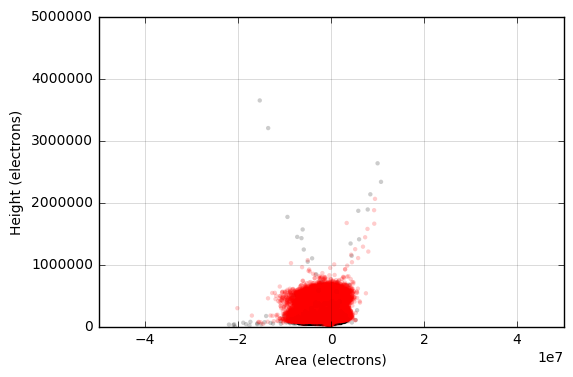

In [20]:
plt.scatter(datpmt1['area'], datpmt1['height'], edgecolor = 'none', s=10, alpha = 0.2, color = 'black')
plt.scatter(datpmt2['area'], datpmt2['height'], edgecolor = 'none', s=10, alpha = 0.2, color = 'red')
plt.xlabel("Area (electrons)")
plt.ylabel("Height (electrons)")
plt.grid(alpha=0.2, linestyle='-')
plt.ylim([0,5e6])
plt.xlim([-0.5e8, 0.5e8])
plt.show()

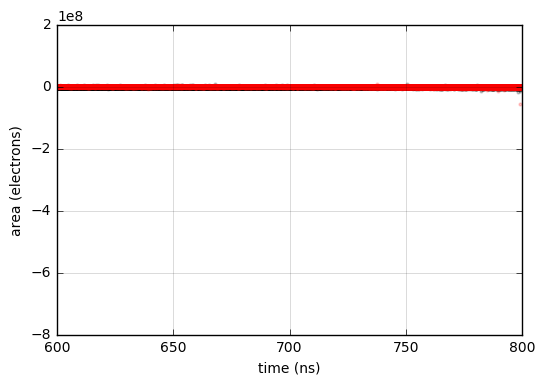

In [4]:
plt.scatter(datpmt1['center'], datpmt1['area'], s=4, alpha = 0.2, color = 'black')
plt.scatter(datpmt2['center'], datpmt2['area'], s=4, alpha = 0.2, color = 'red')
plt.xlabel("time (ns)")
plt.ylabel("area (electrons)")
plt.grid(alpha=0.2, linestyle='-')
plt.xlim([600, 800])
plt.show()

(0.1, 1000000.0)

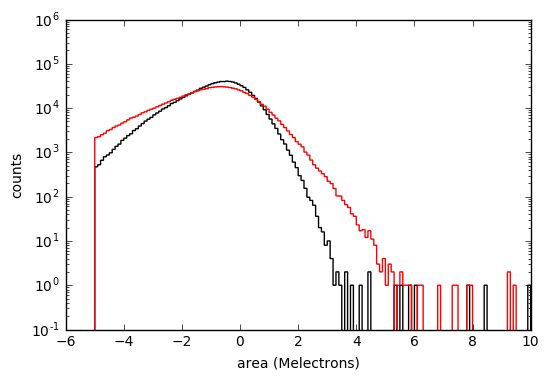

In [12]:
histboundaries = [-5, 10]
histbinwidth = 0.1
histbins = np.arange(histboundaries[0], histboundaries[1]+histbinwidth, histbinwidth)
centers = np.arange(histboundaries[0]+histbinwidth/2.0, histboundaries[1], histbinwidth)

melecs1 = datpmt1['area']/1e6
melecs2 = datpmt2['area']/1e6

hist1 = plt.hist(melecs1, bins=histbins, histtype='step', color = 'black')
counts1 = hist1[0]
countserr1 = [np.sqrt(t)+1 for t in counts1]

hist2 = plt.hist(melecs2, bins=histbins, histtype='step', color = 'red')
counts2 = hist2[0]
countserr2 = [np.sqrt(t)+1 for t in counts2]

plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
plt.yscale('log')
# plt.xlim(-1,2)
plt.ylim(1e-1,1e6)


pmt 1:        [  3.74914891e+04  -8.28358667e-01   1.01188265e+00]
with errors:  [  8.97673293e+02   2.05836767e-02   1.44360027e-02] 

pmt 2:        [  2.79399947e+04  -1.04218840e+00   1.36289109e+00]
with errors:  [  5.50213502e+02   2.24500661e-02   1.67217554e-02]


(1.1, 1000000.0)

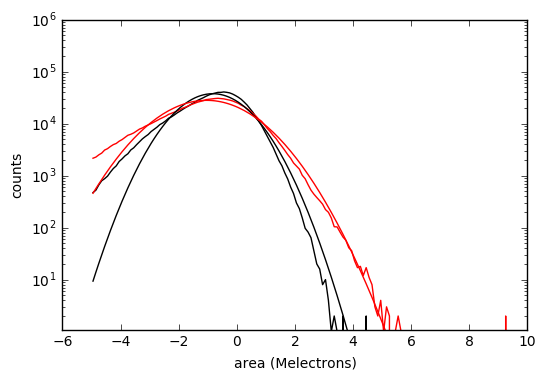

In [13]:
def gauss(x, a, b, s):
    return a * np.exp(-(x-b)**2/(2*s**2))


popt1, pcov1 = curve_fit(gauss, centers, counts1, sigma = countserr1, p0 = [2400, -0.1, 0.5])
popt2, pcov2 = curve_fit(gauss, centers, counts2, sigma = countserr2, p0 = [2400, -0.1, 0.5])
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))

print('pmt 1:       ', popt1)
print('with errors: ', perr1, '\n')
print('pmt 2:       ', popt2)
print('with errors: ', perr2)

fitcounts1 = [gauss(t, popt1[0], popt1[1], popt1[2]) for t in centers]
fitcounts2 = [gauss(t, popt2[0], popt2[1], popt2[2]) for t in centers]

plt.plot(centers, counts1, color = 'black')
plt.plot(centers, counts2, color = 'red')
plt.plot(centers, fitcounts1, color='black', linewidth = 1)
plt.plot(centers, fitcounts2, color='red', linewidth = 1)
plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
plt.yscale('log')
plt.ylim(1.1,1e6)

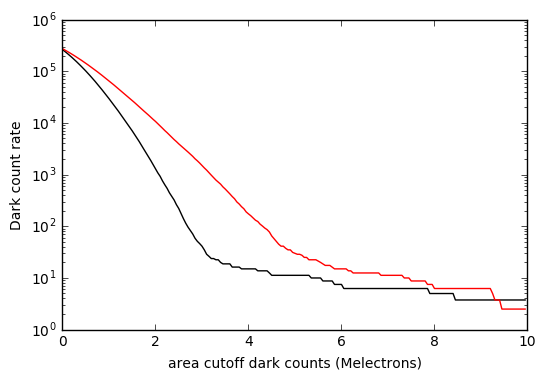

In [14]:
arealist = list(np.arange(0,10,0.05))
ratelist1 = [len(datpmt1[datpmt1['area'] > t*1e6])/len(datpmt1)*1.25e6 for t in arealist]
ratelist2 = [len(datpmt2[datpmt2['area'] > t*1e6])/len(datpmt2)*1.25e6 for t in arealist]
plt.plot(arealist, ratelist1, color = 'black')
plt.plot(arealist, ratelist2, color = 'red')
plt.xlabel("area cutoff dark counts (Melectrons)")
plt.ylabel("Dark count rate")
plt.yscale('log')


4.004999999999999e-06


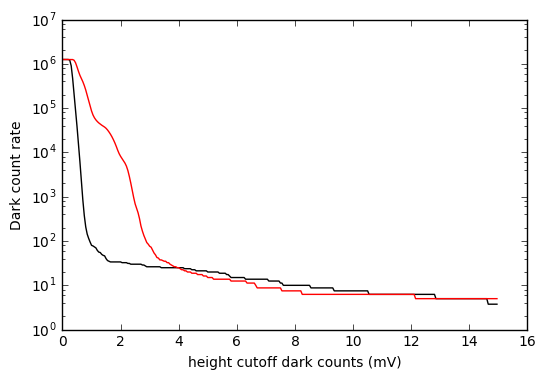

In [15]:
milvlist = list(np.arange(0,15,0.05))
conv = 1.602e-19*50/(2e-9)*10**3
print(conv)
ratelist1 = [len(datpmt1[datpmt1['height'] > t/conv])/len(datpmt1)*1.25e6 for t in milvlist]
ratelist2 = [len(datpmt2[datpmt2['height'] > t/conv])/len(datpmt2)*1.25e6 for t in milvlist]
plt.plot(milvlist, ratelist1, color = 'black')
plt.plot(milvlist, ratelist2, color = 'red')
plt.xlabel("height cutoff dark counts (mV)")
plt.ylabel("Dark count rate")
plt.yscale('log')

In [9]:
datpmt2[datpmt2['area']>10e6]

,Event,area,center,channel,found_in_pulse,height,index_of_maximum,is_rejected,left,n_saturated,noise_sigma,right,sum_absolute_deviation,baseline,noise_sigma_adc
862972,862972,1.026600e+07,832.671449,0,0,2.944107e+06,414,0,200,0,27686.104272,600,-12.176663,60.584999,3.633810
1085434,1085434,1.016543e+08,564.849981,0,0,1.787543e+07,263,0,200,0,76180.272363,600,24.670205,59.845001,9.998684
